In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# IMPORTING THE DATASET

df = pd.read_csv('kc_house_data.csv')

# DATA EXPLORATION

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# DATA DIMENSIONS

df.shape

# Data has 21613 rows and 21 columns

(21613, 21)

In [6]:
# DATA SUMMARY AND DATA TYPES

df.info()

# 1. This has 21 features, and non null data from initial impressions
# 2. Except date column, all other features are numeric 
# 3. Date feature needs to converted into date time 
# 4. Need to check the importance of the features before we decide on what to use for model building

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
# CONVERTING THE DATE COLUMN FROM OBJECT TO DATE TIME FORMAT

df['date'] = pd.to_datetime(df['date'])

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# CHECKING FOR SPECIAL CHARACTERS

for col in df.columns:
    unique_values = df[col].unique()
    print(f'Unique values of {col}: {unique_values}')

Unique values of id: [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
Unique values of date: ['2014-10-13T00:00:00.000000000' '2014-12-09T00:00:00.000000000'
 '2015-02-25T00:00:00.000000000' '2015-02-18T00:00:00.000000000'
 '2014-05-12T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2015-01-15T00:00:00.000000000' '2015-04-15T00:00:00.000000000'
 '2015-03-12T00:00:00.000000000' '2015-04-03T00:00:00.000000000'
 '2014-05-27T00:00:00.000000000' '2014-05-28T00:00:00.000000000'
 '2014-10-07T00:00:00.000000000' '2015-01-24T00:00:00.000000000'
 '2014-07-31T00:00:00.000000000' '2014-05-29T00:00:00.000000000'
 '2014-12-05T00:00:00.000000000' '2015-04-24T00:00:00.000000000'
 '2014-05-14T00:00:00.000000000' '2014-08-26T00:00:00.000000000'
 '2014-07-03T00:00:00.000000000' '2014-05-16T00:00:00.000000000'
 '2014-11-20T00:00:00.000000000' '2014-11-03T00:00:00.000000000'
 '2014-06-26T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2014-06-24T00:00:00.000000000' '2015-

# DATA CLEANING

In [19]:
#1. Null values or missing values

df.isnull().sum()

# There are no unique value or null values in this dataset. 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# 2. Duplicates

df.duplicated().sum()

# No duplicate values have been found

0

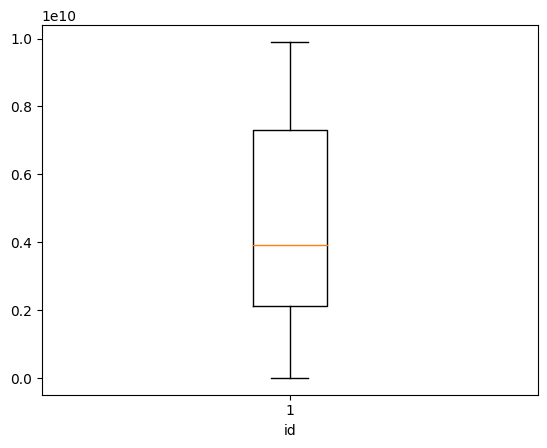

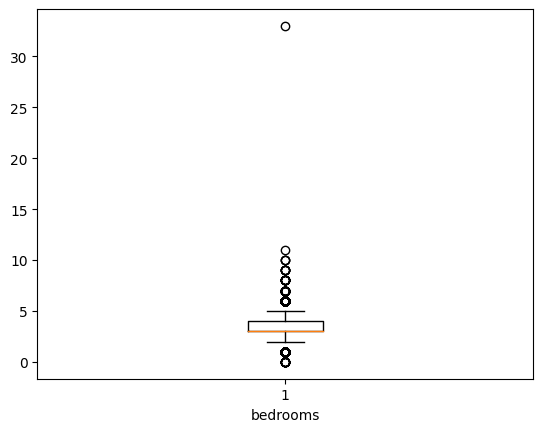

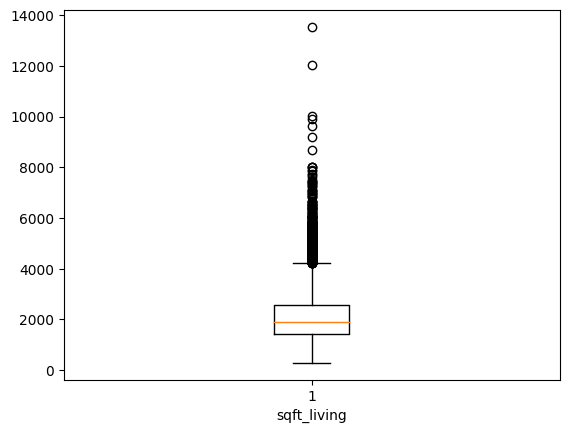

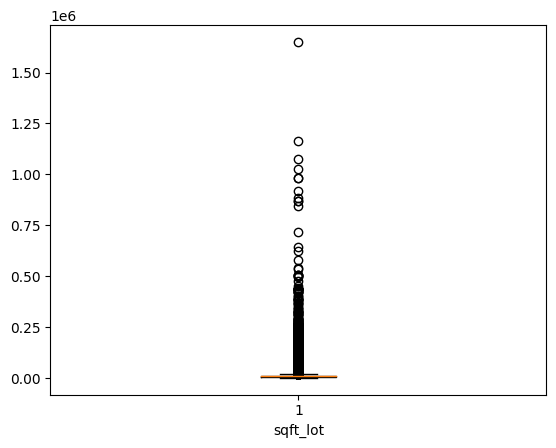

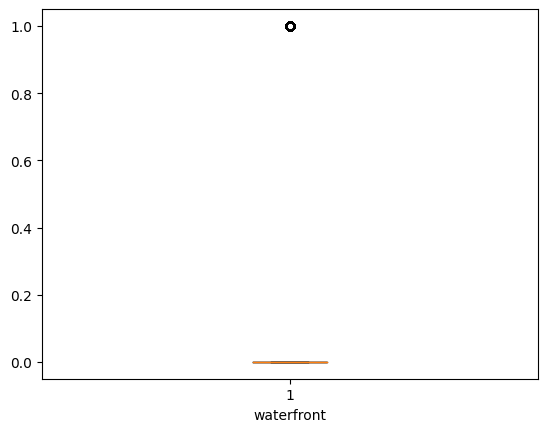

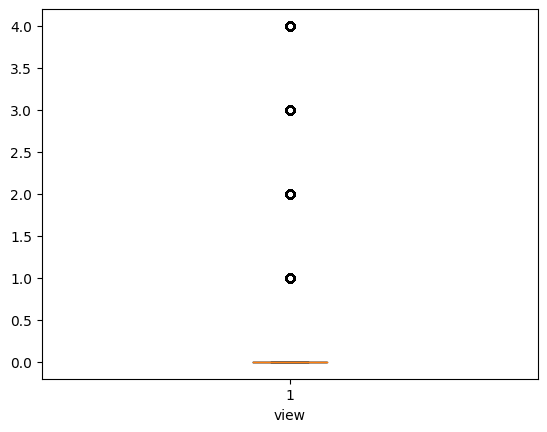

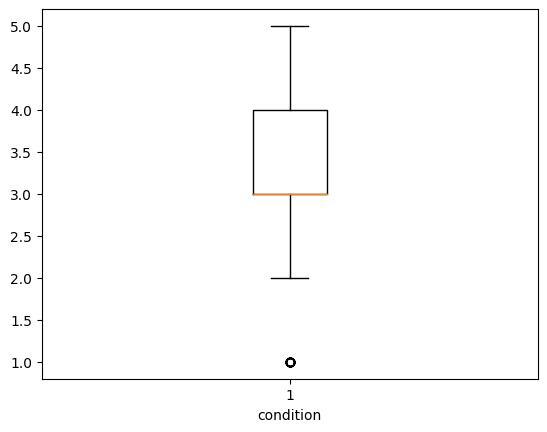

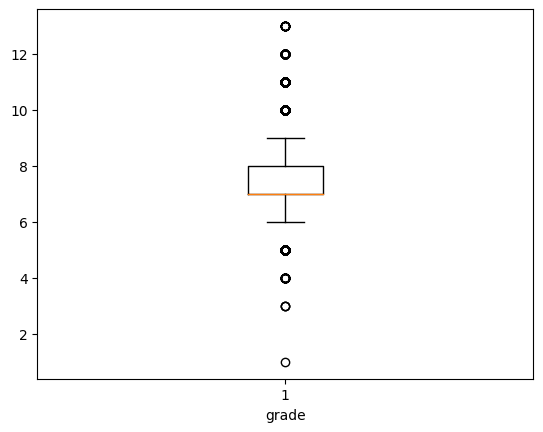

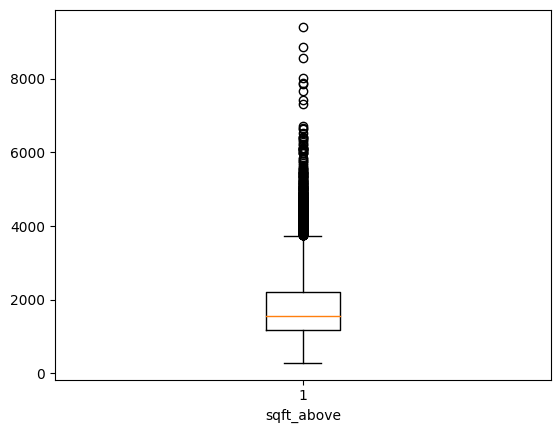

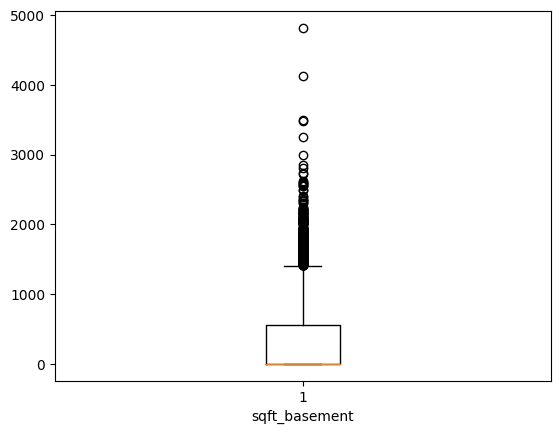

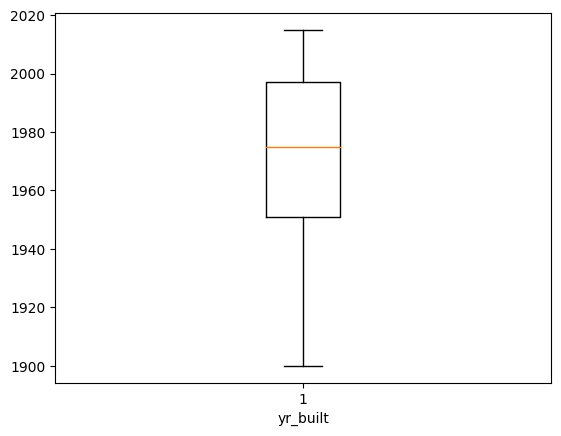

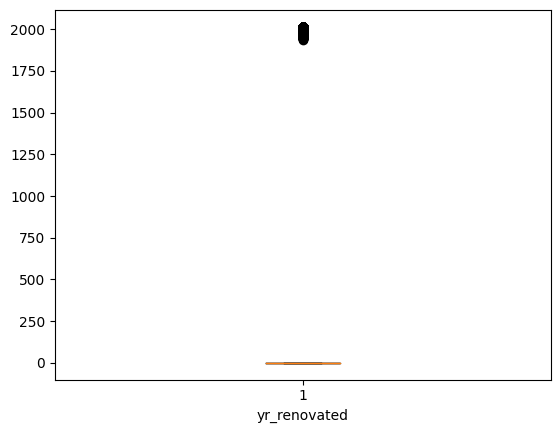

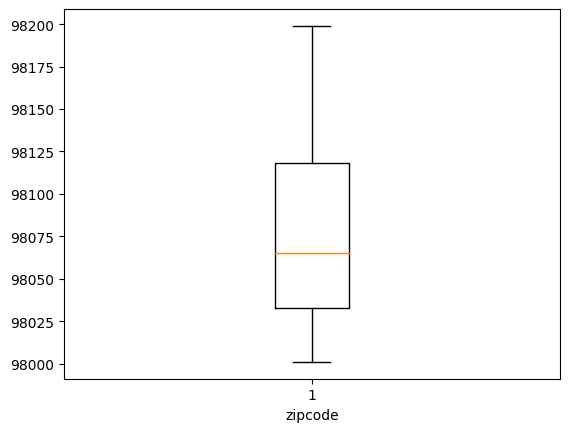

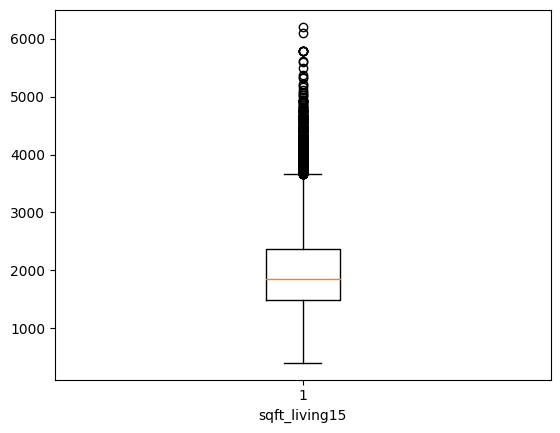

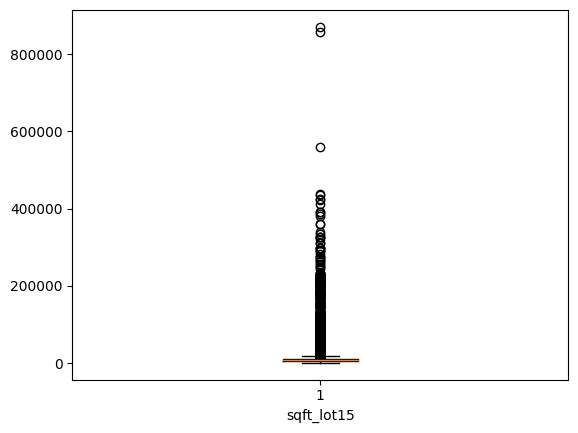

In [30]:
# 3. Outliers

cols = ['price']

for col in df.columns:
    if df[col].dtype == 'int' and 'float':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()
        
#         There are outliers in all the columns, we will check if there is a need to handle them 

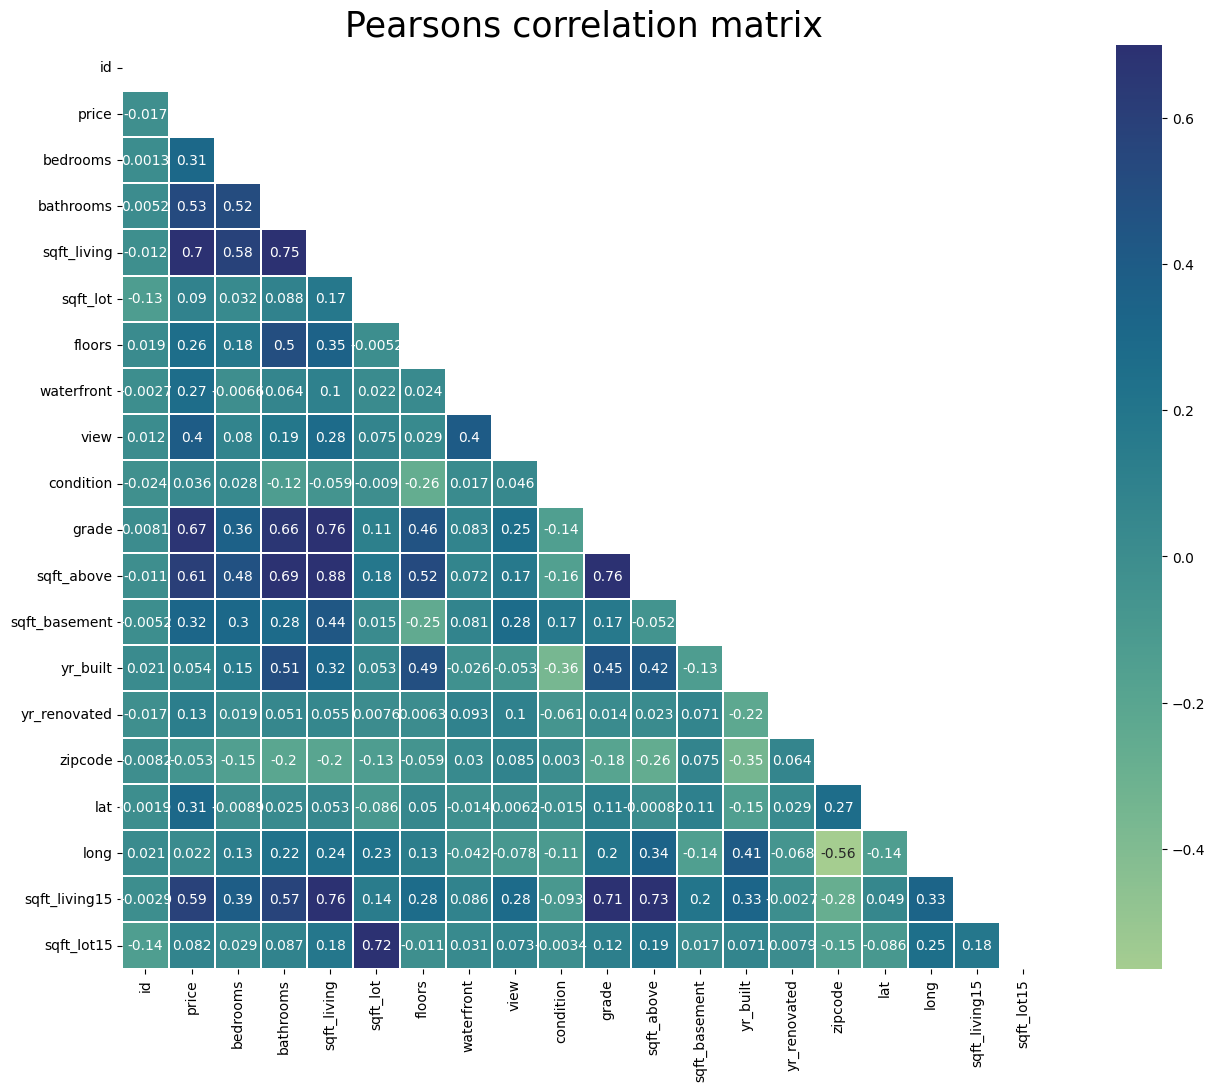

In [61]:
# DATA CORRELATION

matrix = np.triu(df.corr(numeric_only = True))

plt.figure(figsize =(18,12))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "crest", mask = matrix, 
            linewidths=0.25,vmax=0.7,square=True,)
plt.title("Pearsons correlation matrix", fontsize = 25)
plt.show()

# There are multiple features positively correlating with the price value
# Here are the following features:
    
#     1. Bedrooms = 0.31
#     2. Bathrooms = 0.53
#     3. Sqft_living = 0.7
#     4. Floors = 0.26
#     5. Waterfront = 0.27
#     6. View = 0.4
#     7. Grade = 0.67
#     8.SQ_ft above = 0.61
#     9. yr_renovated = 0.31
#     10. lat = 0.31
#     11. sqft_living = 0.59
    
    

In [77]:
# Sorting the correlation coefficients

heatmap = df.corr().sort_values(by = 'price', ascending = False)
heatmap = heatmap.iloc[1:,1]
heatmap

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_66491/4178647169.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = df.corr().sort_values(by = 'price', ascending = False)


sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

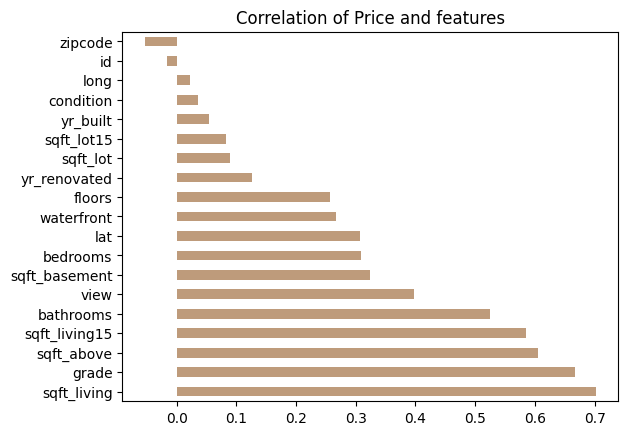

In [87]:
heatmap.plot(kind = 'barh', color="#be9b7b")
plt.title('Correlation of Price and features')
plt.show()

# Sqft living, Grade, Sqft above, bathrooms, view, bedrooms, waterfront, floor have the most correlation with the
# price values

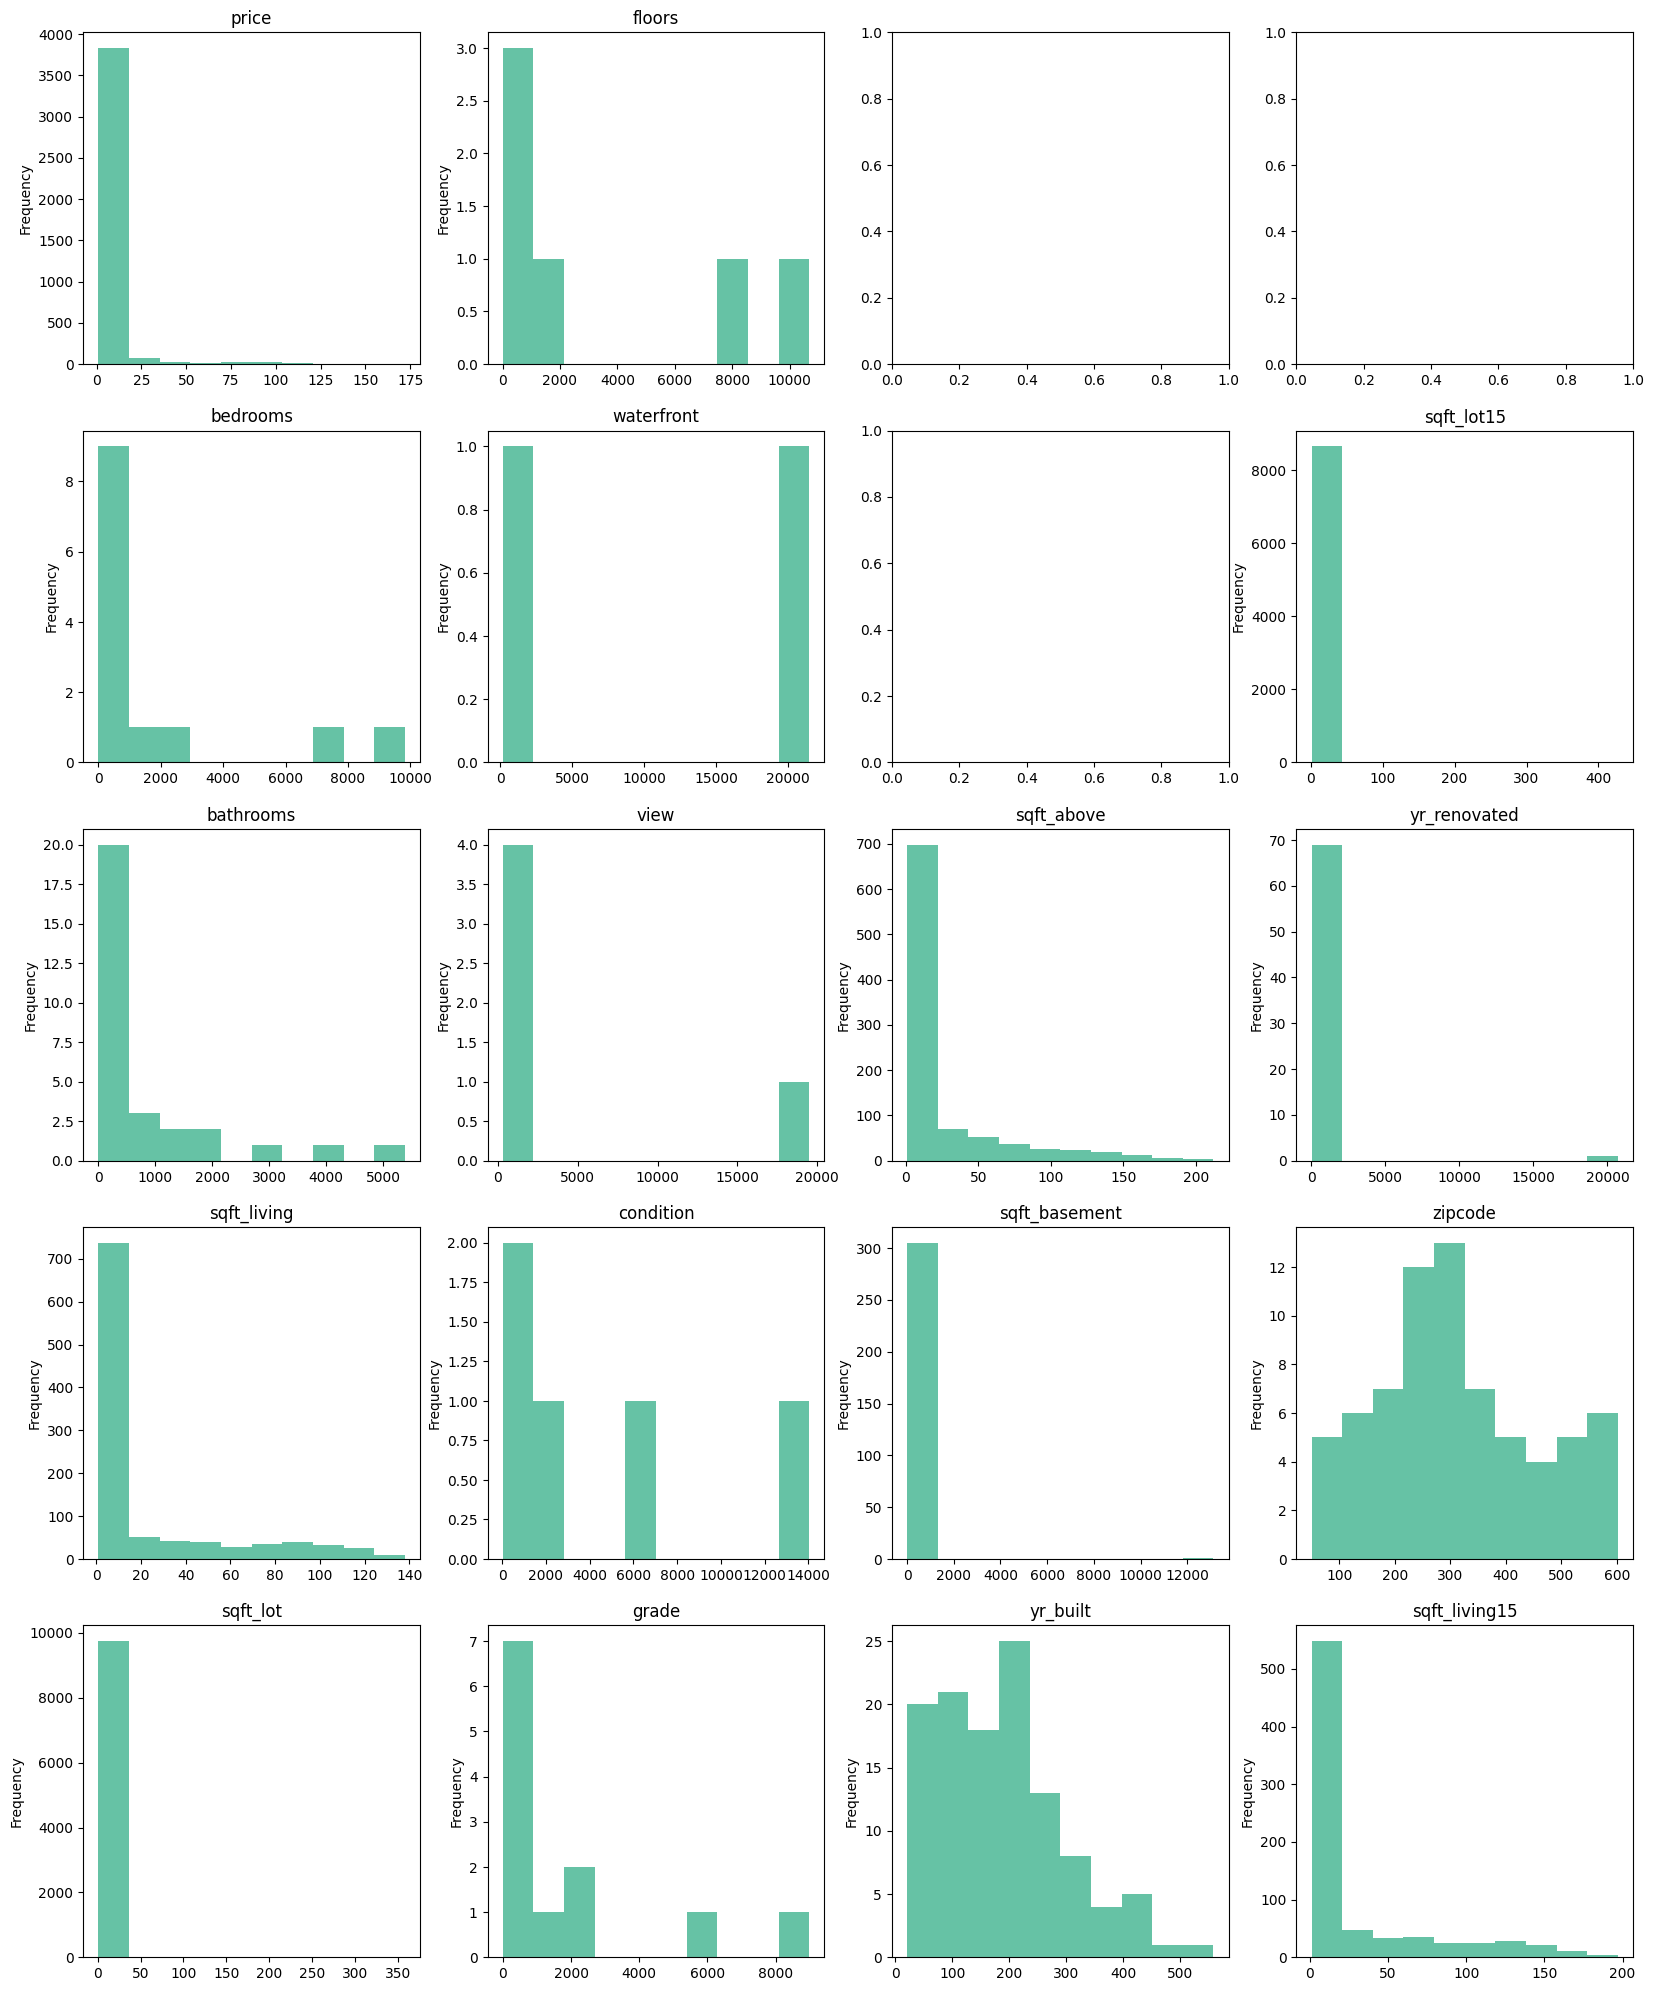

In [126]:
# VISUALISING FEATURES

df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']]


fig, axes = plt.subplots(nrows = 5,ncols = 4,figsize = (20,25))
for i, item in enumerate(df1):
    if i < 5:
        ax = df1[item].value_counts().plot(kind = 'hist',ax=axes[i-5,0],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
        
    elif i >4 and i<10:
        ax = df1[item].value_counts().plot(kind = 'hist',ax=axes[i-10,1],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
    
    elif i >9 and i<13:
        ax = df1[item].value_counts().plot(kind = 'hist',ax=axes[i-13,2],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
    
    elif i >12 and i<16:
        ax = df1[item].value_counts().plot(kind = 'hist',ax=axes[i-16,3],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
    
    elif i >15 and i<20:
        ax = df1[item].value_counts().plot(kind = 'hist',ax=axes[i-20,3],rot = 0, color = ['#66c2a5','#fc8d62','#8da0cb'])
    
    ax.set_title(item)

In [ ]:
# INSIGHTS

# 1. More houses when the grade is higher and lesser houses when the grade is lower
# 2. Few houses have 3.5 floors and above while majority of houses have only one floor
# 3. Higher number of houses have 1 bedroom

# NUMBER OF BEDROOMS AND PRICE

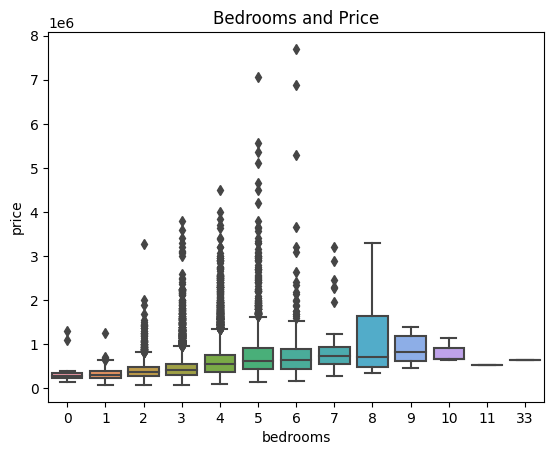

In [153]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
plt.title('Bedrooms and Price')
plt.show()

# There is a high variability in data for houses having bedrooms between 2-6 assuming its due to geography
# Interestingly the houses with 11 and 33 bedrooms have a lower mean price
# Mean price of houses increase as bedrooms increase 


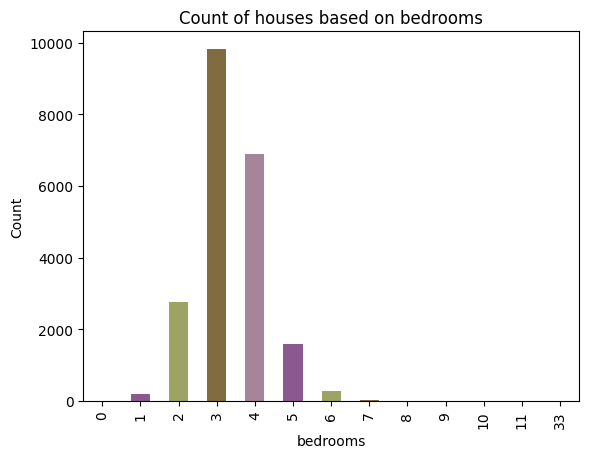

In [152]:
df.groupby('bedrooms')['price'].count().plot(kind = 'bar', color = ['#a6849a','#8b5990','#9da363','#816c41'])
plt.title('Count of houses based on bedrooms')
plt.ylabel('Count')
plt.show()

# 9824 houses have three bedrooms, followed by 4 bed and two bed
# 1600 houses have 5 bed 

In [149]:
Sqft living, Grade, Sqft above, bathrooms, view, , waterfront, floor have the most correlation with the
# price values

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Text(0, 0.5, 'price')

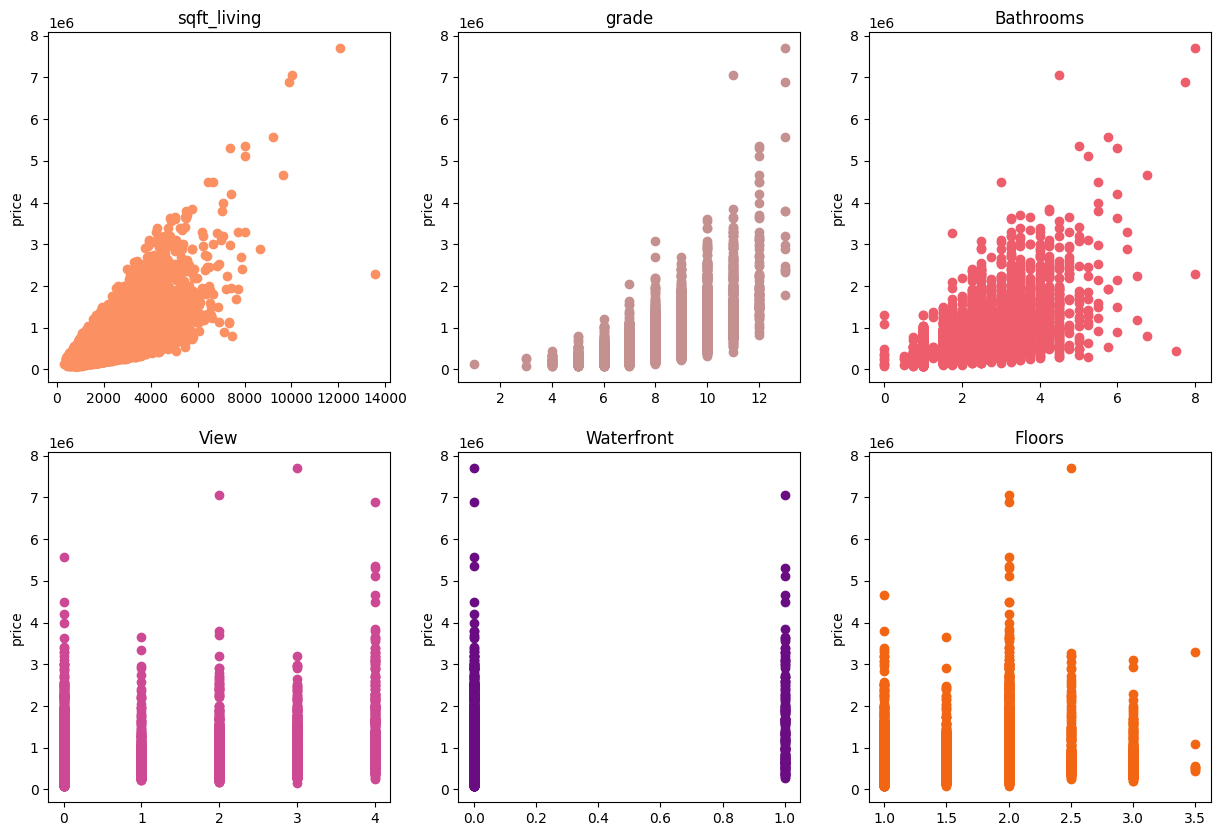

In [238]:
plt.subplots(2,3, figsize = (15,10))
plt.ylabel('price')

color = '#8b5990'

plt.subplot(2,3,1)
plt.scatter(df['sqft_living'], df['price'], color = '#fb9062')
plt.title('sqft_living')
plt.ylabel('price')

plt.subplot(2,3,2)
plt.scatter(df['grade'], df['price'], color = '#c49090')
plt.title('grade')
plt.ylabel('price')

plt.subplot(2,3,3)
plt.scatter(df['bathrooms'], df['price'],color = '#ee5d6c' )
plt.title('Bathrooms')
plt.ylabel('price')

plt.subplot(2,3,4)
plt.scatter(df['view'], df['price'], color = '#ce4993')
plt.title('View')
plt.ylabel('price')

plt.subplot(2,3,5)
plt.scatter(df['waterfront'], df['price'], color = '#6a0d83')
plt.title('Waterfront')
plt.ylabel('price')

plt.subplot(2,3,6)
plt.scatter(df['floors'], df['price'], color = '#f26513')
plt.title('Floors')
plt.ylabel('price')

In [ ]:
# # INSIGHTS

# 1. There is direct correlation between price rise and sqft of living room
# 2. The higher the grade the higher is the price
# 3. Most the houses have bathrooms less than 4 and the more tha number of bathrooms the average price goes up
# 4. Houses with View dont necessarily have a huge change in price


# WATERFRONT HOUSES

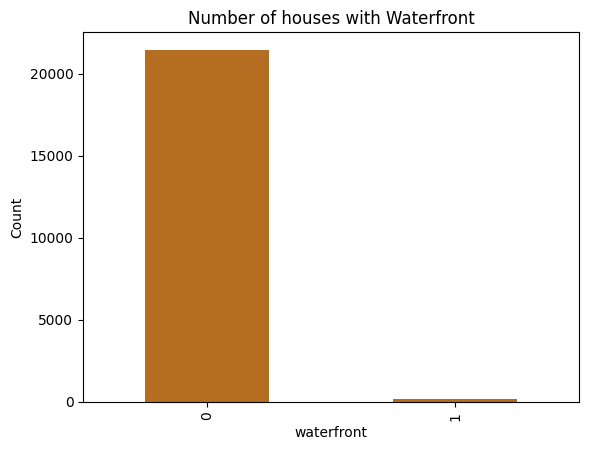

In [245]:
df.groupby(['waterfront'])['price'].size().plot(kind = 'bar', color = '#b56d22')
plt.title('Number of houses with Waterfront')
plt.ylabel('Count')
plt.show()

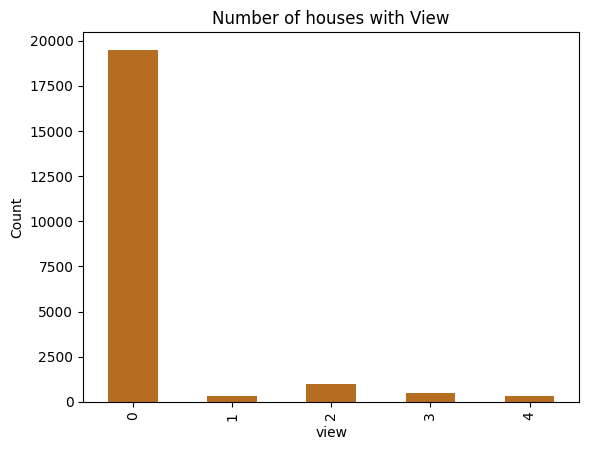

In [246]:
# HOUSES WITH VIEW

df.groupby(['view'])['price'].size().plot(kind = 'bar', color = '#b56d22')
plt.title('Number of houses with View')
plt.ylabel('Count')
plt.show()

In [247]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# GRADE AND PRICE

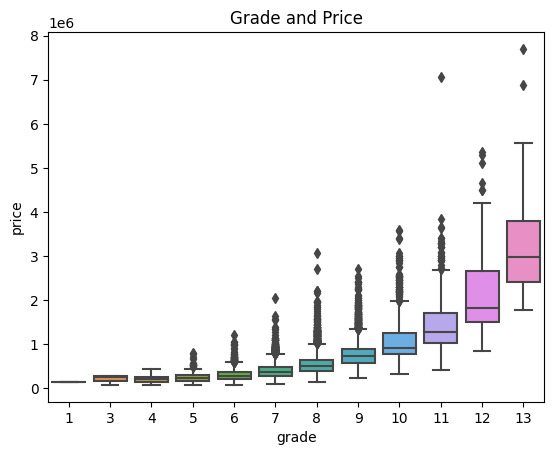

In [248]:
sns.boxplot(x = 'grade', y = 'price', data = df)
plt.title('Grade and Price')
plt.show()


# There is a definite increase in prices as the grade increases

In [ ]:
# BATHROOMS AND PRICE CHANGE

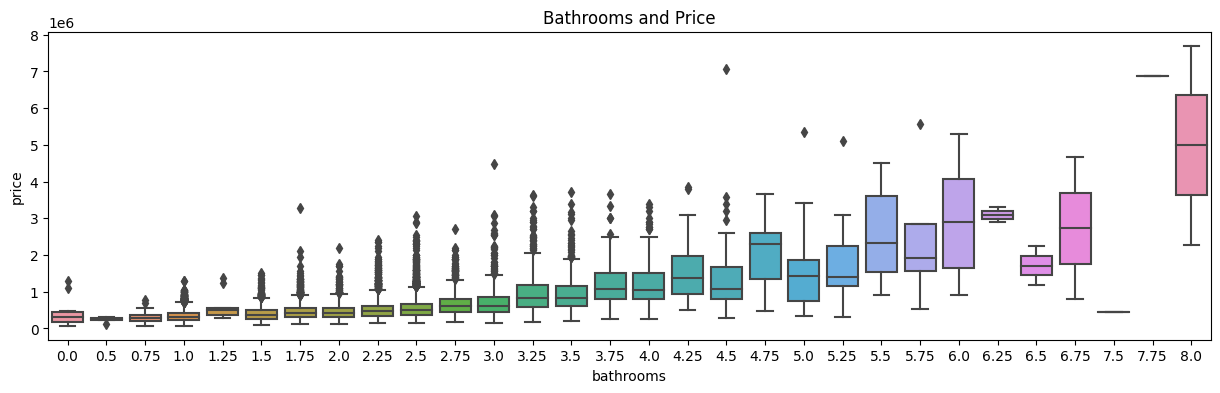

In [251]:
plt.figure(figsize = (15,4))
sns.boxplot(x = 'bathrooms', y = 'price', data = df )
plt.title('Bathrooms and Price')
plt.show()


# There is a definite increase in price as the number of bathrooms increses
# # A sharp rise in price when the bathrooms double 
# We see a lot of variability in the prices of houses between 1-3.5 bathrooms indicating there are other factors 
# contributing to the change in price along with bathrooms

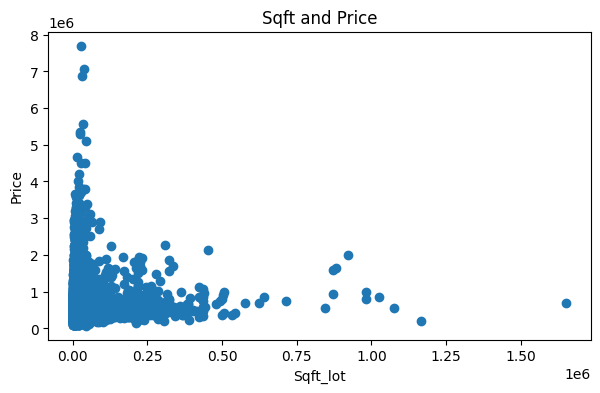

In [262]:
plt.figure(figsize = (7,4))
plt.scatter(x = 'sqft_lot', y = 'price', data = df )
plt.title('Sqft and Price')
plt.xlabel('Sqft_lot')
plt.ylabel('Price')
plt.show()

# Most of the houses have less than 2000 sqfeet

# ZIPCODE ANALYSIS

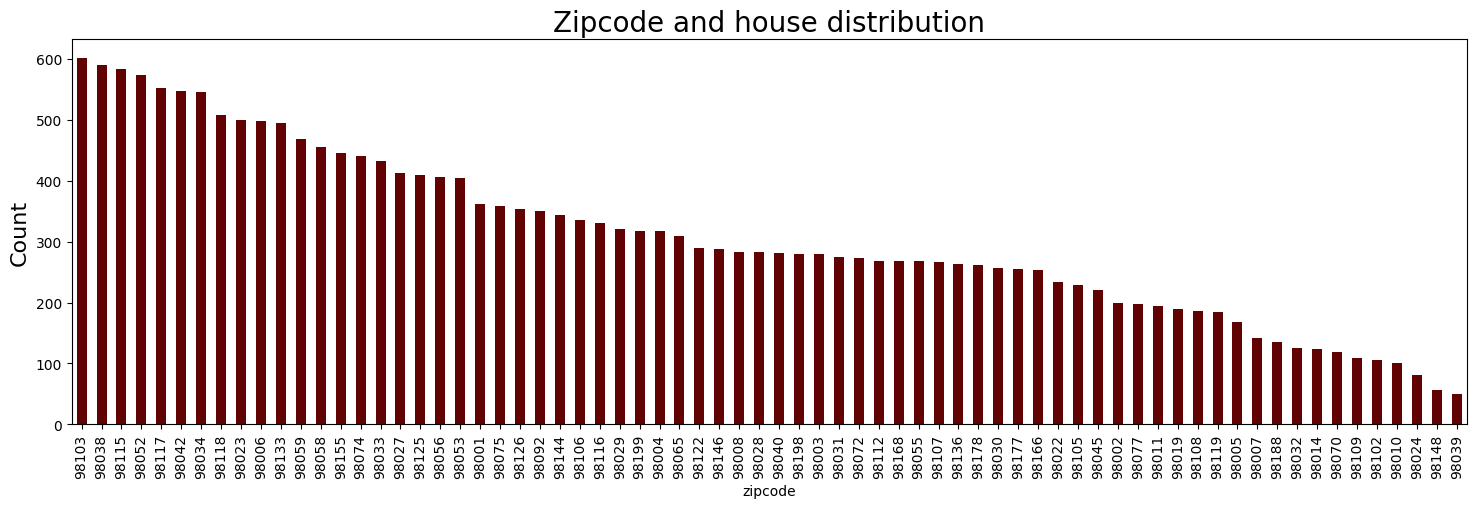

In [276]:
df.groupby('zipcode')['price'].size().sort_values(ascending = False).plot(kind = 'bar', figsize = (18,5), color = '#620303')
plt.title('Zipcode and house distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [ ]:
# There are some postcodes which have higher number of houses 

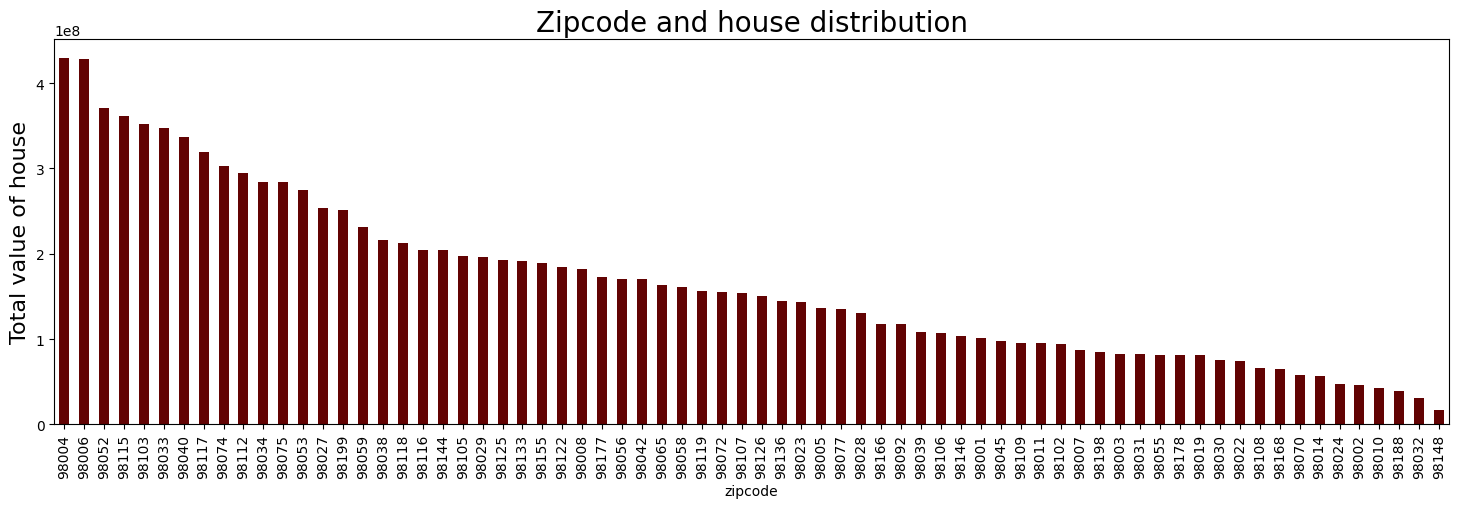

In [280]:
df.groupby('zipcode')['price'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (18,5), color = '#620303')
plt.title('Zipcode and house distribution', fontsize = 20)
plt.ylabel('Total value of house', fontsize = 16)
plt.show()

In [ ]:
# 98004 and 98006 has the highest value of houses

# FEATURE SCALING

In [295]:
X = df.drop(columns = ['price','date'], axis = 1)
y= df['price']

In [298]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# SPLITTING DATA INTO TRAIN TEST SPLIT

In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
# MODEL BUILDING WITH PYCARET

In [301]:
from pycaret.regression import *

In [302]:
s = setup(df, target = 'price')

,Description,Value
0,Session id,5319
1,Target,price
2,Target type,Regression
3,Original data shape,"(21613, 21)"
4,Transformed data shape,"(21613, 23)"
5,Transformed train set shape,"(15129, 23)"
6,Transformed test set shape,"(6484, 23)"
7,Numeric features,19
8,Date features,1
9,Preprocess,True


In [303]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,66978.7104,15328463221.4636,122479.8040,0.8851,0.1701,0.1274,0.0550
et,Extra Trees Regressor,69313.1310,16594107775.4256,128212.0984,0.8755,0.1759,0.1303,0.7880
xgboost,Extreme Gradient Boosting,68521.2453,17491939225.6000,130802.3562,0.8691,0.1726,0.1276,0.0820
rf,Random Forest Regressor,70082.6462,17795607128.9773,132115.5429,0.8669,0.1775,0.1313,1.7220
gbr,Gradient Boosting Regressor,77203.5923,18985528395.7121,136799.6550,0.8576,0.1907,0.1473,0.6730
dt,Decision Tree Regressor,102607.5758,35498304000.0854,187552.9521,0.7317,0.2552,0.1888,0.0530
ridge,Ridge Regression,125252.9177,39681283503.3026,198902.9637,0.7009,0.4041,0.2548,0.0220
br,Bayesian Ridge,125248.5592,39682007438.3707,198904.8935,0.7009,0.4059,0.2547,0.0230
llar,Lasso Least Angle Regression,125274.8359,39681298806.3770,198902.3420,0.7009,0.4024,0.2549,0.0190
lasso,Lasso Regression,125274.8365,39681298809.6763,198902.3421,0.7009,0.4024,0.2549,0.1250


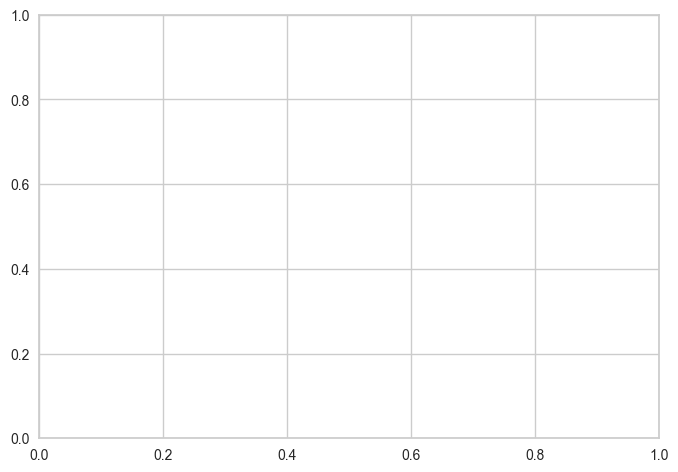

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [306]:
evaluate_model(best)

In [307]:
pred_holdout = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,67188.7186,15610686847.6361,124942.7343,0.8882,0.1700,0.1270


In [310]:
new_data = df.copy().drop('price', axis = 1)

In [311]:
predictions = predict_model(best, data = new_data)

In [313]:
save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['id', 'bedrooms', 'bathrooms',
                                              'sqft_living', 'sqft_lot',
                                              'floors', 'waterfront', 'view',
                                              'condition', 'grade', 'sqft_above',
                                              'sqft_basement', 'yr_built',
                                              'yr_renovated', 'zipcode', 'lat',
                                              'long', 'sqft_living15',
                                              'sqft_lot15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(i

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,prediction_label
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.511200,-122.257004,1340,5650,226243.060937
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.721001,-122.319000,1690,7639,502125.952889
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.737900,-122.233002,2720,8062,306151.596390
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.520802,-122.392998,1360,5000,445718.367510
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.616798,-122.044998,1800,7503,524886.974242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.699299,-122.346001,1530,1509,446853.983332
21609,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.510700,-122.362000,1830,7200,467855.638645
21610,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.594398,-122.299004,1020,2007,332701.477857
21611,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.534500,-122.069000,1410,1287,417378.350947


In [315]:
# USING LIGHTBGM AS THE MODEL
from lightgbm import LGBMRegressor

In [316]:
lgbm_model = LGBMRegressor(random_state=42)

In [318]:
# Train the model
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2586
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 19
[LightGBM] [Info] Start training from score 538980.332331


LGBMRegressor(random_state=42)

In [321]:
# Make predictions
lgbm_pred = lgbm_model.predict(X_test)

In [342]:
from sklearn.metrics import r2_score

# Calculate r2_score

r2_score(y_test, lgbm_pred)

0.8908197176991829

In [323]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, lgbm_pred)
print(f"MAE: {mae}")

RMSE: 124584.96965217456
MAE: 67929.72241916748


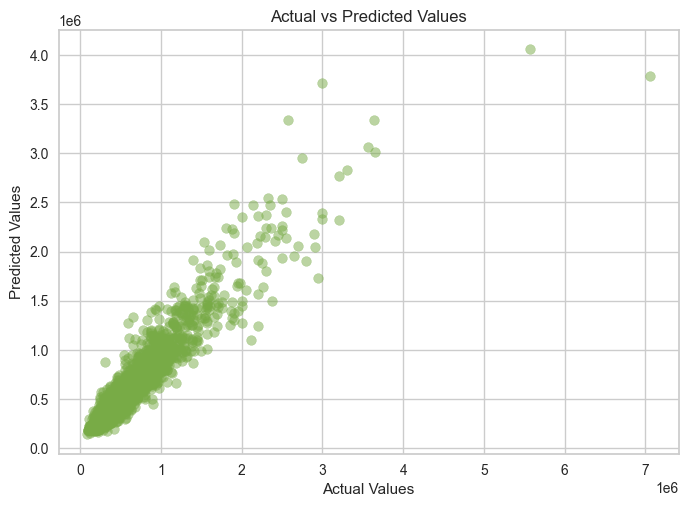

In [351]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, lgbm_pred, alpha=0.5, color = '#78ab46')

# Add title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

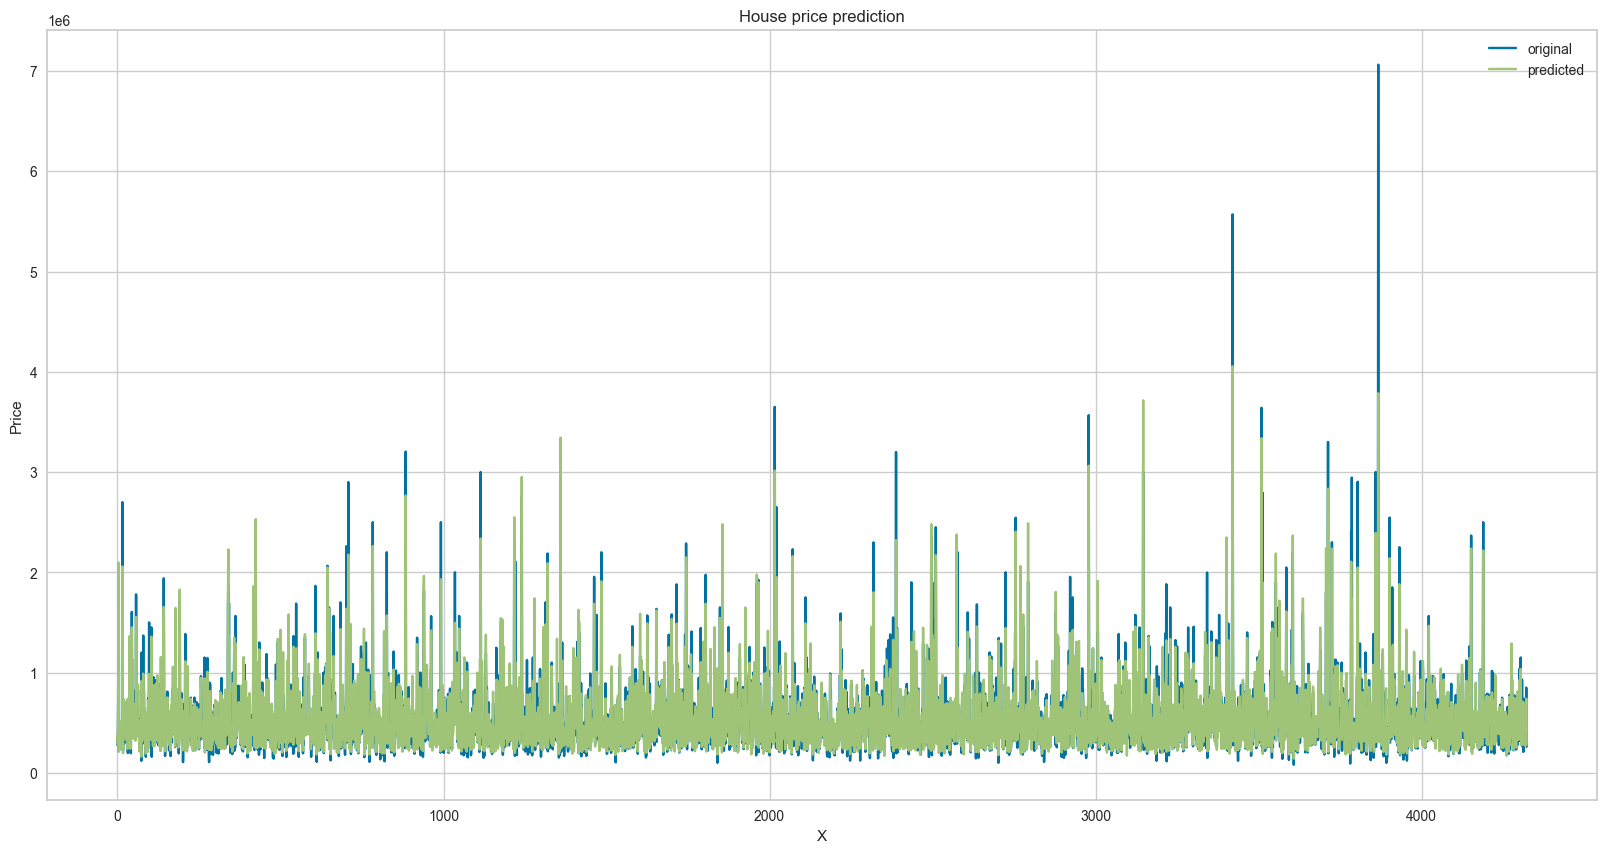

In [365]:
x_ax = range(len(y_test))
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lgbm_pred, label="predicted")
plt.title("House price prediction")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  